In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
import numpy as np

In [2]:
df = pd.read_csv('../model/nearest_nightlights_per_city.csv')
df

,city_code,city,uf,lat,long,radiance,geometry,distance_to_city,rank
0,1101450,Parecis,RO,-12.158334,-61.604166,0.235929,POINT (-61.6041657195 -12.158334030600004),0.022360,89.0
1,1101450,Parecis,RO,-12.158334,-61.599999,0.252750,POINT (-61.5999990528 -12.158334030600004),0.021586,83.0
2,1101450,Parecis,RO,-12.158334,-61.595832,0.253744,POINT (-61.5958323861 -12.158334030600004),0.021602,85.0
3,1101450,Parecis,RO,-12.158334,-61.591666,0.231304,POINT (-61.5916657194 -12.158334030600004),0.022406,90.0
4,1101450,Parecis,RO,-12.162501,-61.612499,0.235071,POINT (-61.61249905289999 -12.162500697300004),0.022594,91.0
...,...,...,...,...,...,...,...,...,...
13995,5204250,Cachoeira Dourada,GO,-18.508334,-49.470832,1.707905,POINT (-49.4708322891 -18.508334081400008),0.019299,67.0
13996,5204250,Cachoeira Dourada,GO,-18.508334,-49.466666,1.696757,POINT (-49.4666656224 -18.508334081400008),0.019761,72.0
13997,5204250,Cachoeira Dourada,GO,-18.508334,-49.462499,1.550770,POINT (-49.4624989557 -18.508334081400008),0.021055,81.0
13998,5204250,Cachoeira Dourada,GO,-18.508334,-49.458332,0.853822,POINT (-49.458332289 -18.508334081400008),0.023040,98.0


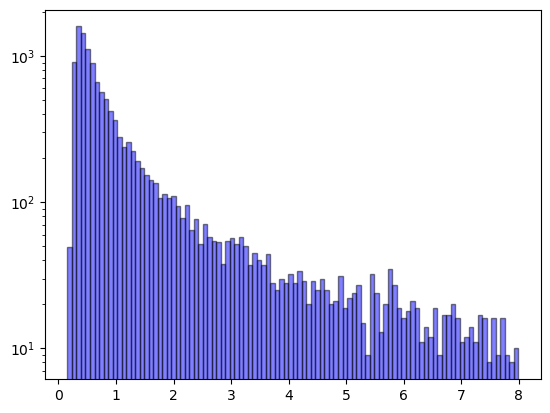

In [60]:
final_list = df[df['radiance'] < 8]
num_bins = 100
plt.hist(final_list['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')

In [22]:
p25 = df['radiance'].quantile(0.25)
p50 = df['radiance'].quantile(0.5)
p75 = df['radiance'].quantile(0.75)
# print(df['radiance'].quantile(0.25))

Text(1.656710875, 2200, '1.86')

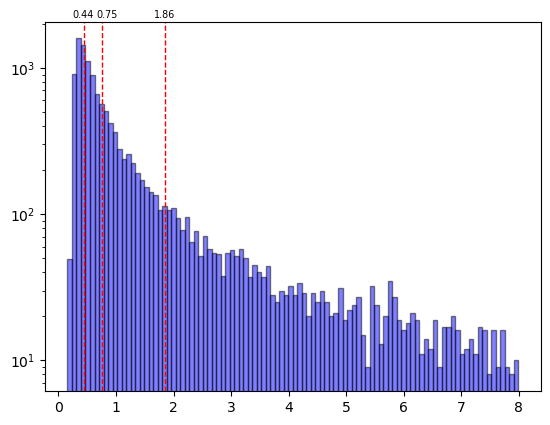

In [90]:
num_bins = 100
plt.hist(final_list['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')
plt.axvline(p25, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p50, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p75, color='r', linestyle='dashed', linewidth=1)

plt.text(p25-0.2, 2200, "{:.2f}".format(p25), fontsize='x-small')
plt.text(p50-0.1, 2200, "{:.2f}".format(p50), fontsize='x-small')
plt.text(p75-0.2, 2200, "{:.2f}".format(p75), fontsize='x-small')


Text(9.392716640188537, 22000, '9.59')

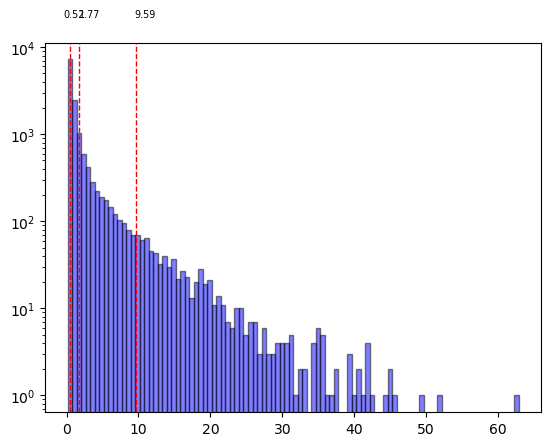

In [97]:
mixture = GaussianMixture(n_components=3).fit(np.array(df['radiance']).reshape(-1, 1))
means_hat = np.sort(mixture.means_.flatten())
means_hat
gmm1 = means_hat[0]
gmm2 = means_hat[1]
gmm3 = means_hat[2]

num_bins = 100
plt.hist(df['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')
plt.axvline(gmm1, color='r', linestyle='dashed', linewidth=1)
plt.axvline(gmm2, color='r', linestyle='dashed', linewidth=1)
plt.axvline(gmm3, color='r', linestyle='dashed', linewidth=1)

plt.text(gmm1-1, 22000, "{:.2f}".format(gmm1), fontsize='x-small')
plt.text(gmm2, 22000, "{:.2f}".format(gmm2), fontsize='x-small')
plt.text(gmm3-0.2, 22000, "{:.2f}".format(gmm3), fontsize='x-small')


In [75]:
df[(df['radiance'] < 99999) & (df['radiance'] > gmm3)] 

,city_code,city,uf,lat,long,radiance,geometry,distance_to_city,rank
35,1101450,Parecis,RO,-12.175001,-61.604166,5.814130,POINT (-61.6041657195 -12.175000697400009),0.007832,11.0
36,1101450,Parecis,RO,-12.175001,-61.599999,4.792283,POINT (-61.5999990528 -12.175000697400009),0.005225,5.0
45,1101450,Parecis,RO,-12.179167,-61.608332,5.901311,POINT (-61.6083323862 -12.179167364099996),0.010355,19.0
46,1101450,Parecis,RO,-12.179167,-61.604166,13.603523,POINT (-61.6041657195 -12.179167364099996),0.006203,7.0
47,1101450,Parecis,RO,-12.179167,-61.599999,12.507647,POINT (-61.5999990528 -12.179167364099996),0.002107,1.0
...,...,...,...,...,...,...,...,...,...
13984,5204250,Cachoeira Dourada,GO,-18.504167,-49.483332,7.913709,POINT (-49.48333228920001 -18.504167414700007),0.019573,69.0
13985,5204250,Cachoeira Dourada,GO,-18.504167,-49.479166,6.314629,POINT (-49.479165622500005 -18.504167414700007),0.017234,55.0
13986,5204250,Cachoeira Dourada,GO,-18.504167,-49.474999,10.278358,POINT (-49.4749989558 -18.504167414700007),0.015673,43.0
13987,5204250,Cachoeira Dourada,GO,-18.504167,-49.470832,9.319122,POINT (-49.4708322891 -18.504167414700007),0.015132,42.0
